<a href="https://colab.research.google.com/github/yohanesnuwara/machine-learning/blob/master/06_simple_linear_regression/simple_linear_reg_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Simple Linear Regression**

In [0]:
import numpy as np
import matplotlib.pyplot as plt

## Method 1

Calculate bias (or intercept $B_0$) and slope ($B_1$) using:

$$B_1 = \frac{\sum_{i=1}^{n}(x_i-mean(x))(y_i-mean(y))}{\sum_{i=1}^{n}(x_i-mean(x))^2}$$

$$B_0 = mean(y) - B_1 \cdot mean(x)$$

to construct simple linear regression model: $$y = B_0 + B_1 \cdot x$$

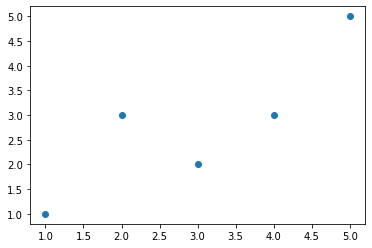

In [100]:
x = [1, 2, 4, 3, 5]
y = [1, 3, 3, 2, 5]

# visualize our data 
plt.plot(x, y, 'o')

Calculate mean of data

In [12]:
mean_x = np.mean(x)
mean_y = np.mean(y)
print(mean_x, mean_y)

3.0 2.8


Calculate error

In [13]:
err_x = x - mean_x
err_y = y - mean_y
print(err_x)
print(err_y)

[-2. -1.  1.  0.  2.]
[-1.8  0.2  0.2 -0.8  2.2]


Multiply error of x and error of y

In [14]:
err_mult = err_x * err_y
print(err_mult)

[ 3.6 -0.2  0.2 -0.   4.4]


Calculate numerator by summing up the errors

In [15]:
numerator = np.sum(err_mult)
numerator

8.0

Calculate denominator by squaring the x error and summing them up

In [16]:
err_x_squared = err_x**2
denominator = np.sum(err_x_squared)
print(denominator)

10.0


Calculate the **slope (B1)** !

In [17]:
B1 = numerator / denominator
print(B1)

0.8


And we can calculate the **intercept (c)** !

In [18]:
B0 = mean_y - B1 * mean_x
print(B0)

0.39999999999999947


We now have the coefficents for our simple linear regression equation.
$$y = B_0 + B_1 x = 0.4 + 0.8 x$$


### Test the model to our training data

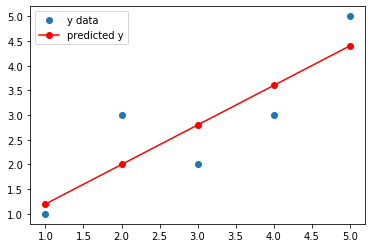

In [30]:
x_test = np.array([1, 2, 3, 4, 5])
y_predicted = B0 + B1 * x_test

p1 = plt.plot(x, y, 'o')
p2 = plt.plot(x_test, y_predicted, 'o-', color='r')
plt.legend((p1[0], p2[0]), (['y data', 'predicted y']))

### Estimating Error (Root Mean Squared Error)

$$RMSE = \sqrt{\frac{\sum_{i=1}^{n} (p_i - y_i)^2}{n}}$$

In [28]:
numerator = np.sum((y_predicted - y)**2)
denominator = len(y)
rmse = np.sqrt(numerator / denominator)
rmse

0.692820323027551

### Wrap all up

In [0]:
def simple_linear_regression_wayone(x, y, x_test):
  import numpy as np
  x = np.array(x); y = np.array(y); x_test = np.array(x_test)
  mean_x = np.mean(x)
  mean_y = np.mean(y)
  err_x = x - mean_x
  err_y = y - mean_y
  err_mult = err_x * err_y
  numerator = np.sum(err_mult)
  err_x_squared = err_x**2
  denominator = np.sum(err_x_squared)
  B1 = numerator / denominator
  B0 = mean_y - B1 * mean_x
  y_predicted = B0 + B1 * x_test
  return(B0, B1, y_predicted)

def linreg_error(y, y_predicted):
  y = np.array(y); y_predicted = np.array(y_predicted)
  numerator = np.sum((y_predicted - y)**2)
  denominator = len(y)
  rmse = np.sqrt(numerator / denominator)
  return(rmse)

## Method 2

Calculate bias (or intercept $B_0$) and slope ($B_1$) using:

$$B_1 = corr(x, y) \cdot \frac{stdev(y)}{stdev(x)}$$

Then, similar to **Method 1**. 
$$B_0 = mean(y) - B_1 \cdot mean(x)$$

to construct simple linear regression model: $$y = B_0 + B_1 \cdot x$$

Calculate the **pearson's correlation coefficient $corr(x,y)$**. First, calculate mean and standard deviation.

In [101]:
import statistics as stat
mean_x = np.mean(x)
mean_y = np.mean(y)
stdev_x = stat.stdev(x)
stdev_y = stat.stdev(y)
print(stdev_x, stdev_y)

1.5811388300841898 1.4832396974191326


Calculate **covariance**. Covariance is the relationship that can be summarized between two variables. The sign of the covariance can be interpreted as whether the two variables change in the same direction (positive) or change in different directions (negative). A covariance value of zero indicates that both variables are completely independent.

In [102]:
cov_x_y = (np.sum((x - mean_x) * (y - mean_y))) * (1 / (len(x) - 1))
cov_x_y

2.0

Calculate **Pearson's Correlation Coefficient**. It summarizes the strength of the linear relationship between two data samples. It is the normalization of the covariance between the two variables. The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation. A value of 0 means no correlation. The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.

In [103]:
corr_x_y = cov_x_y / (stdev_x * stdev_y)
corr_x_y

0.8528028654224417

Calculate slope $B_1$

In [104]:
B1 = corr_x_y * (stdev_y / stdev_x)
B1

0.7999999999999998

Next, is similar to **Method 1**. 

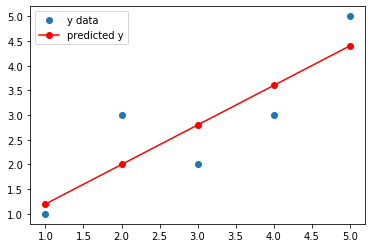

In [105]:
B0 = mean_y - B1 * mean_x

x_test = np.array([1, 2, 3, 4, 5])
y_predicted = B0 + B1 * x_test

p1 = plt.plot(x, y, 'o')
p2 = plt.plot(x_test, y_predicted, 'o-', color='r')
plt.legend((p1[0], p2[0]), (['y data', 'predicted y']))

Calculate RMSE

In [111]:
rmse = linreg_error(y, y_predicted)
rmse

0.8944271909999159